In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [7]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.mnist.load_data()

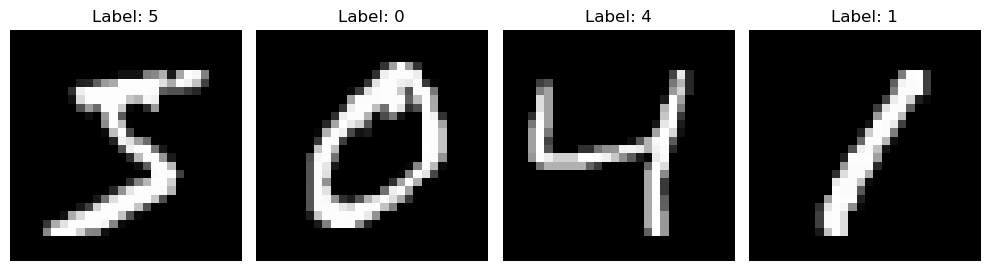

In [8]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [21]:
X_train.size

47040000

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 6, strides = (1,1), kernel_size = (5,5), activation = 'tanh', input_shape = input_shape))
model.add(tf.keras.layers.AveragePooling2D(pool_size = (2,2), strides = (2,2)))
model.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (5,5), strides = (1,1), activation = 'tanh'))
model.add(tf.keras.layers.AveragePooling2D(pool_size = (2,2), strides = (2,2)))
model.add(tf.keras.layers.Conv2D(filters = 120, kernel_size = (5,5), strides = (1,1), activation = 'tanh'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units = 84, activation = 'tanh'))
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))


In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20


ValueError: Exception encountered when calling Conv2D.call().

[1mNegative dimension size caused by subtracting 5 from 4 for '{{node sequential_4_1/conv2d_11_1/convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_4_1/average_pooling2d_8_1/AvgPool, sequential_4_1/conv2d_11_1/convolution/ReadVariableOp)' with input shapes: [?,4,4,16], [5,5,16,120].[0m

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(None, 4, 4, 16), dtype=float32)